# OK Cupid Date a Scientist

In this project data from OK Cupid dating app will be analysed using machine learning models.

To start, even before defining the goals it's necessary to load and inspect the data, see how many columns there are and what each one represents, see the length of the data and find out the main missing values.
After all of that it's done, we can now define our goals.

Firstly let's load the necessary libraries.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Inspect the Data

Using the pandas library we will import the file "profiles.csv", which is the file that all of our data is on.
First we'll create a DataFrame named "profiles", then the first five rows will be inspected and the name of the columns obtained.

After loading and giving a first inspection to the data some things can be said:
* the data is composed by 31 diferent columns;
* 10 of those columns are essays, wich mean that we will have to ignore them in our data analysis;
* the rest of them are about the lifestyles, education, etc. Meaning that they are important to the data analysis;
* the data is composed by 59946 rows, and because each row is a user, it means that there is information about 59946 users.

In [4]:
profiles = pd.read_csv("profiles.csv")

print(profiles.head())
print(profiles.columns)
print(len(profiles))

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

## Create Summary Statistics

Now that the data as been somewhat explored it's time to get rid of the data that can not be easily explored (the essays) and create visualizations from the other columns.
Then let's figure out what are the columns with the most missing values and plot them in an bar plot.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

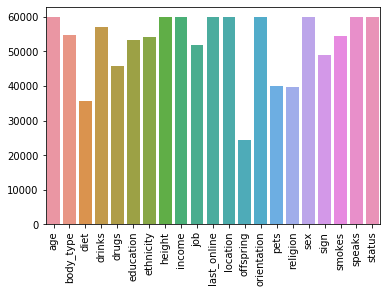

In [24]:
useful_columns = ['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
                  'last_online', 'location', 'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes',
                  'speaks', 'status']
profiles_clean = profiles[useful_columns]
missing = pd.DataFrame()

for column in useful_columns:
    missing[column] = profiles_clean[column].isna().value_counts()
    
sns.barplot(data = missing)
plt.xticks(rotation = 90)